###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**


###**objective: to build a predictive ML model, which could help in predicting the views of the videos uploaded on the TEDx website.**

##**Importing Libraries**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import time
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from wordcloud import WordCloud
from sklearn.feature_selection import f_regression

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading csv file in ted talk dataframe
ted_talk_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Ted_Talk_Views_Prediction_Rajesh_Kumar_Patel-Capstone_Project_2/data_ted_talks.csv')

## **Exploratory Data Analysis**

In [ ]:
#how many rows and columns in dataset
ted_talk_data.shape

(4005, 19)

in this dataset total 19 columns and 4005 rows(data points) are present 

In [ ]:
# details information about dataset
ted_talk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
#first 10 datapoints of dataset.
ted_talk_data.head(10)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
5,49,Behind the design of Seattle's library,Joshua Prince-Ramus,{0: 'Joshua Prince-Ramus'},{0: ['architect']},{0: 'Joshua Prince-Ramus is best known as arch...,1208138,2006-02-23,2006-07-10,TED2006,en,"['ar', 'bg', 'en', 'es', 'fr', 'he', 'it', 'ja...",48.0,1198,"['architecture', 'collaboration', 'culture', '...",{750: 'Building a theater that remakes itself'...,https://www.ted.com/talks/joshua_prince_ramus_...,Architect Joshua Prince-Ramus takes the audien...,I'm going to present three projects in rapid f...
6,86,Letting go of God,Julia Sweeney,{0: 'Julia Sweeney'},"{0: ['actor', 'comedian', 'playwright']}",{0: 'Julia Sweeney creates comedic works that ...,4636596,2006-02-24,2006-07-10,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",980.0,992,"['Christianity', 'God', 'atheism', 'comedy', '...","{22: 'Why people believe weird things', 94: ""L...",https://www.ted.com/talks/julia_sweeney_lettin...,When two young Mormon missionaries knock on Ju...,"On September 10, the morning of my seventh bir..."
7,94,Let's teach religion -- all religion -- in sch...,Dan Dennett,{0: 'Dan Dennett'},"{0: ['philosopher', 'cognitive scientist']}",{0: 'Dan Dennett thinks that human consciousne...,3781244,2006-02-02,2006-07-18,TED2006,en,"['ar', 

In [ ]:
# statistical information
ted_talk_data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


in our dataset only 4 columns have numerical value rest of all categorical or textual data

In [ ]:
# Unique numbers of every column datapoints
ted_talk_data.nunique()

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64

###**Details Features information**

* **talk_id**: Talk identification number provided by TED
* **title**: Title of the talk
* **speaker_1**: First speaker in TED's speaker list
* **all_speakers**: Speakers in the talk
* **occupations**: Occupations of the speakers
* **about_speakers**: Blurb about each speaker
* **views**: Count of view(dependent variable)
* **recorded_date**: Date the talk was recorded
* **published_date**: Date the talk was published to TED.com
* **event**: Event or medium in which the talk was given
* **native_lang**: Language the talk was given in
* **available_lang**: All available languages (lang_code) for a talk
* **comments**: Count of comments
* **duration**: Duration in seconds
* **topics**: Related tags or topics for the talk
* **related_talks**: Related talks (key='talk_id',value='title')
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Full transcript of the talk


In [ ]:
#checking duplicate rows 
ted_talk_data.duplicated().sum()

0

no duplicate rows in dataset

In [ ]:
#checking null value in dataset
ted_talk_data.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

5 columns have null values ,first we will explore all features then treat null value 

##**Exploring All Features**


*  ### **talk_id**

In [ ]:
ted_talk_data.talk_id.nunique()

4005

talk_id column same as index number and unique for every datapoints

*  ### **title**

In [ ]:
ted_talk_data.title.nunique()

4005

title column contain unique title for every datapoints

There are 157160 words in the combination of all titles in dataset.



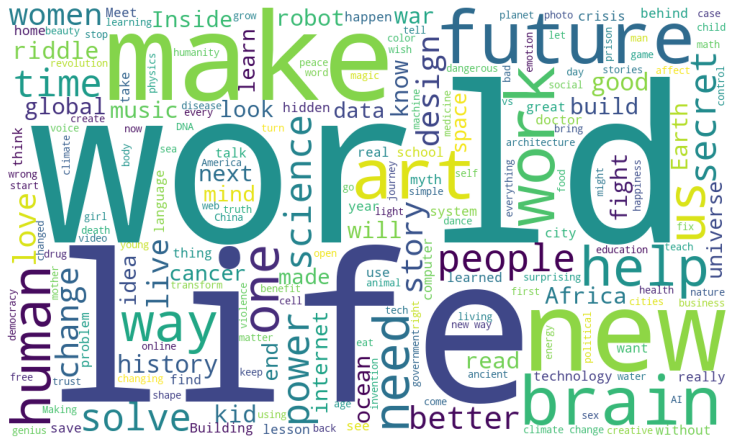

In [ ]:
#visualize word cloud from title
words = ' '.join(text for text in ted_talk_data.title.astype(str))
print(f'There are {len(words)} words in the combination of all titles in dataset.\n')

#generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

Majority of titles contains words: life, world, make, new, future, art, brain,work, human, science.

*   ### **Speaker_1**

In [ ]:
#speaker of top 10 view video
top_10_views_data = ted_talk_data.nlargest(10, ['views'])
top_10_views_data[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


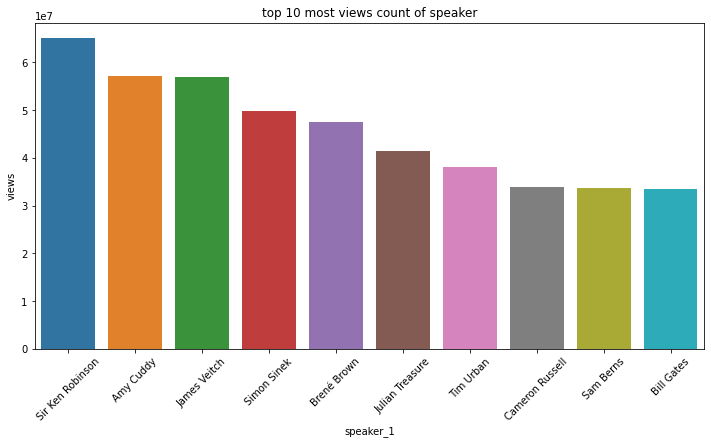

In [ ]:
#visualize speaker of top 10 view video
plt.figure(figsize=(12,6))
plt.title("top 10 most views count of speaker")
sns.barplot('speaker_1','views',data = top_10_views_data)
plt.xticks(rotation = 45)
plt.show()

Sir Ken Robinson,s talk have the highest view count.

* **most popular speaker**

In [ ]:
#top 10 popular speaker
top_10_popular_data=ted_talk_data.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views'])
top_10_popular_data.reset_index(inplace=True)
top_10_popular_data

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


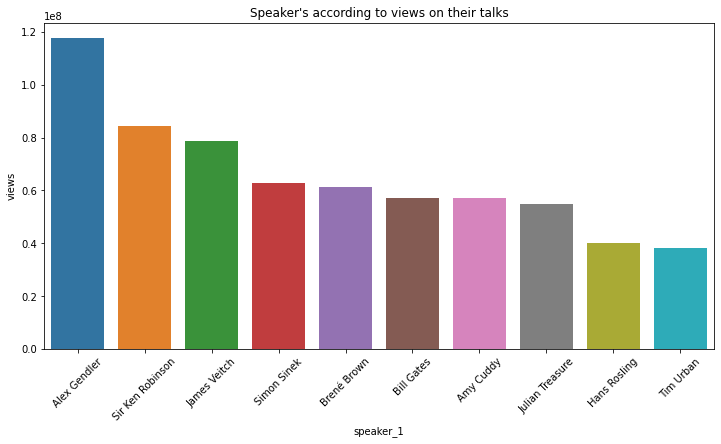

In [ ]:
#visualize top 10 popular speaker
plt.figure(figsize=(12,6))
plt.title("Speaker's according to views on their talks")
sns.barplot('speaker_1','views',data=top_10_popular_data)
plt.xticks(rotation = 45)
plt.show()

Alex Gendler is the most popular speaker.

* ### **Event**

In [ ]:
#top 10 most frequent event
top_10_freq_event=ted_talk_data[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
top_10_freq_event.reset_index(inplace=True)
top_10_freq_event

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


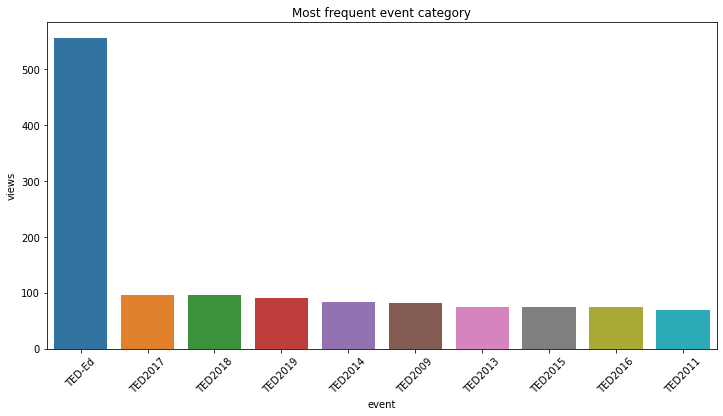

In [ ]:
#visualize top 10 most frequent event
plt.figure(figsize=(12,6))
plt.title('Most frequent event category')
sns.barplot('event','views',data=top_10_freq_event)
plt.xticks(rotation=45)
plt.show()

TED-Ed is the most frequent event

* **popular event**

In [ ]:
#top 10 popular event
top_10_popular=ted_talk_data[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
top_10_popular.reset_index(inplace=True)
top_10_popular

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


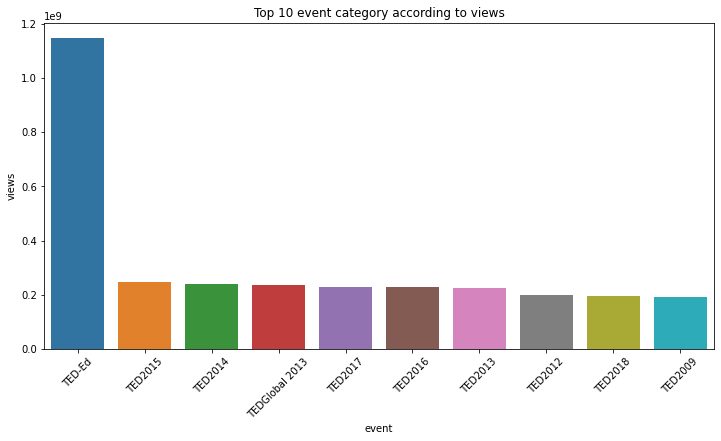

In [ ]:
#visualize top 10 popular event
plt.figure(figsize=(12,6))
plt.title('Top 10 event category according to views')
sns.barplot('event','views',data=top_10_popular)
plt.xticks(rotation=45)
plt.show()

Most popular event is TED-Ed having highest number of total views.

* ### **Topics**

There are 404126 words in the combination of all topics.



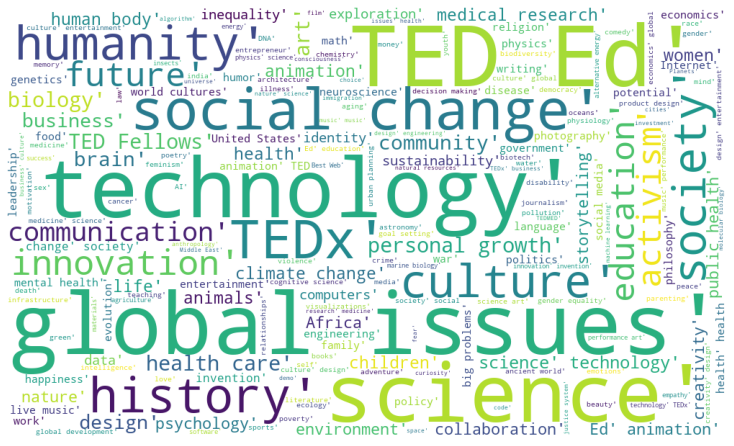

In [ ]:
#word cloud from topics
words =' '.join(text for text in ted_talk_data.topics.astype(str))
print (f'There are {len(words)} words in the combination of all topics.\n')

#generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

Most popular topic tags are TED Ed, technology, global issues, science, TEDx, Social change, humanity, society, activism,education, communication.

* ### **Published_date**

In [ ]:
#convert published_date column to date time format
ted_talk_data['published_date'] = ted_talk_data['published_date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
#create day, month and year from the published_date column
ted_talk_data['published_day'] = ted_talk_data['published_date'].apply(lambda x: x.weekday())
ted_talk_data['published_month']=ted_talk_data['published_date'].apply(lambda x: x.month)
ted_talk_data['published_year'] = ted_talk_data['published_date'].apply(lambda x: x.year)

* #### **published_day**

In [ ]:
# map published_day column with respective week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
ted_talk_data['published_day']=ted_talk_data['published_day'].map(week_day)

In [ ]:
# which day of the month having maximum published
publish_day_freq=ted_talk_data[['published_day','views']].groupby('published_day').agg({'views' : 'count'})
publish_day_freq=publish_day_freq.sort_values('views',ascending=False)
publish_day_freq.reset_index(inplace=True)
publish_day_freq

,published_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


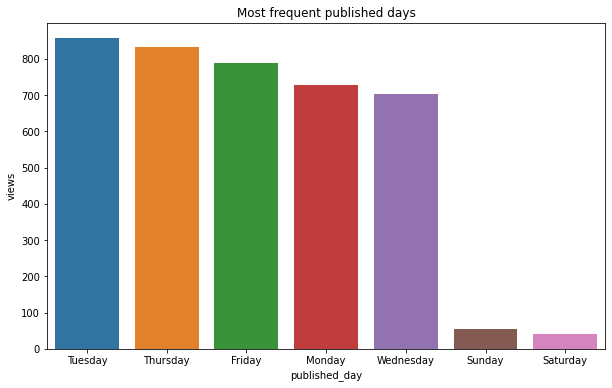

In [ ]:
# visualise which day of the month having maximum published
plt.figure(figsize=(10,6))
sns.barplot('published_day','views',data=publish_day_freq)
plt.title('Most frequent published days')
plt.show()

Most Talks are published on 5 days in week Tuesday,Thursday,Friday,Monday,Wednesday.

In [ ]:
# best published day of the week by average views count
best_day=ted_talk_data[['published_day','views']].groupby('published_day').agg({'views' : 'mean'})
best_day=best_day.sort_values('views',ascending=False)
best_day.reset_index(inplace=True)

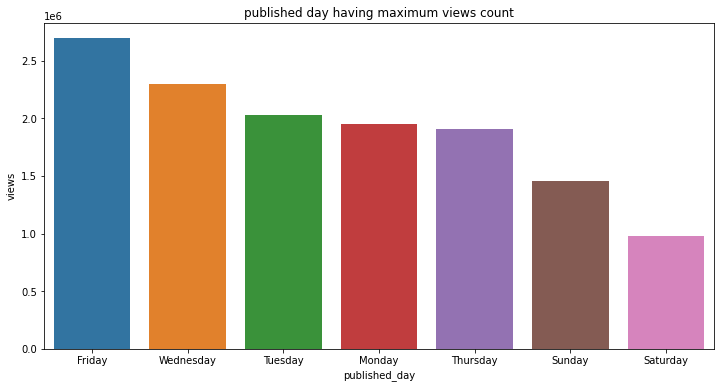

In [ ]:
# visualise best published day of the week by average views count
plt.figure(figsize=(12,6))
plt.title('published day having maximum views count')
sns.barplot('published_day','views',data=best_day)
plt.show()

Friday published talks have more average views count

* #### **published_month**

In [ ]:
# published_month change to respective month name
month_name={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
ted_talk_data['published_month']=ted_talk_data['published_month'].map(month_name)

In [ ]:
# which month maximum published talks
published_month_freq=ted_talk_data[['published_month','views']].groupby('published_month').agg({'views' : 'count'})
published_month_freq=published_month_freq.sort_values('views',ascending=False)
published_month_freq.reset_index(inplace=True)

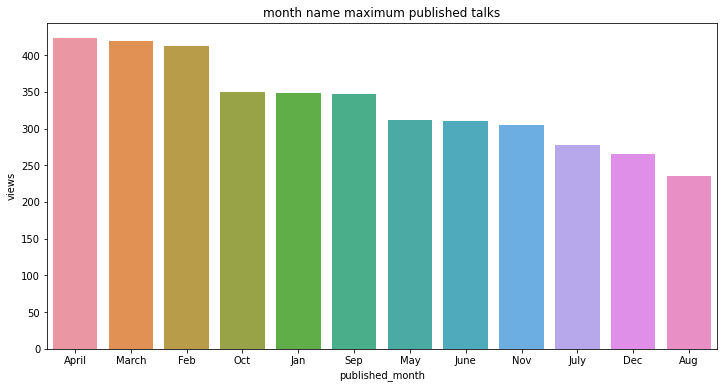

In [ ]:
# visualise which month maximum published talks
plt.figure(figsize=(12,6))
sns.barplot('published_month','views',data=published_month_freq)
plt.title('month name maximum published talks')
plt.show()

April, March, and Feb months have highest frequency of published talks

In [ ]:
# best published months by average views count
published_month_best=ted_talk_data[['published_month','views']].groupby('published_month').agg({'views' : 'mean'})
published_month_best=published_month_best.sort_values('views',ascending=False)
published_month_best.reset_index(inplace=True)

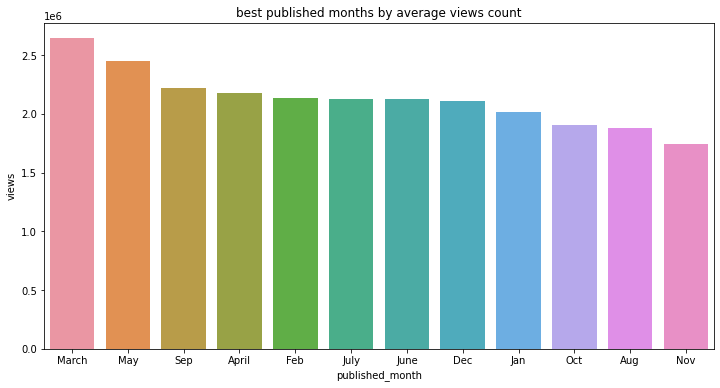

In [ ]:
# visualise best published months by average views count
plt.figure(figsize=(12,6))
plt.title('best published months by average views count')
sns.barplot('published_month','views',data=published_month_best)
plt.show()

March month have more average views count

* #### **Published_year**

In [ ]:
# which years have maximum published 
published_year_freq=ted_talk_data[['published_year','views']].groupby('published_year').agg({'views' : 'count'})
published_year_freq=published_year_freq.sort_values('views',ascending=False)
published_year_freq.reset_index(inplace=True)

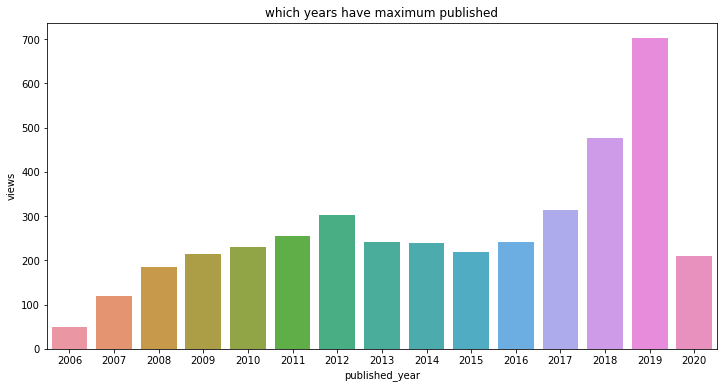

In [ ]:
# visualise which years have maximum published 
plt.figure(figsize=(12,6))
sns.barplot('published_year','views',data=published_year_freq)
plt.title('which years have maximum published')
plt.show()

In 2019 have Published maximum talks

In [ ]:
# best published year by average views count
published_year_best=ted_talk_data[['published_year','views']].groupby('published_year').agg({'views' : 'mean'})
published_year_best=published_year_best.sort_values('views',ascending=False)
published_year_best.reset_index(inplace=True)

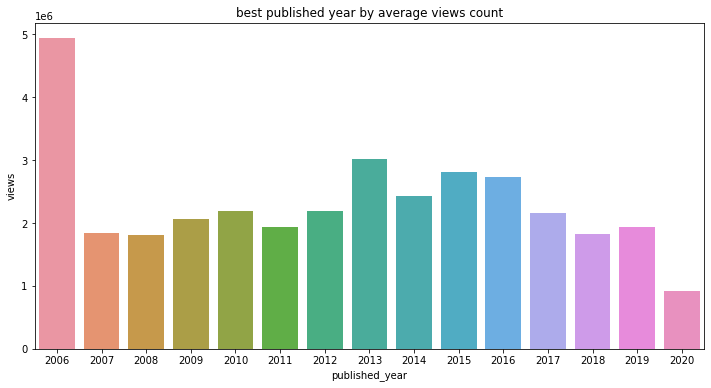

In [ ]:
# visualise best published year by average views count
plt.figure(figsize=(12,6))
plt.title('best published year by average views count')
sns.barplot('published_year','views',data=published_year_best)
plt.show()

in 2016 have highest number of average view count

* ### **Views**

**This is our target as well as numerical variable. So, let's check its distribution.**

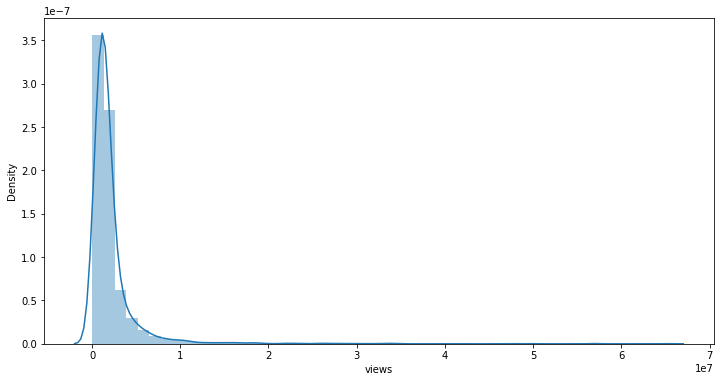

In [ ]:
# distribution of views feature
plt.figure(figsize=(12,6))
sns.distplot(ted_talk_data.views)
plt.show()

views feature are right skewed distribution

* ### **Comments**

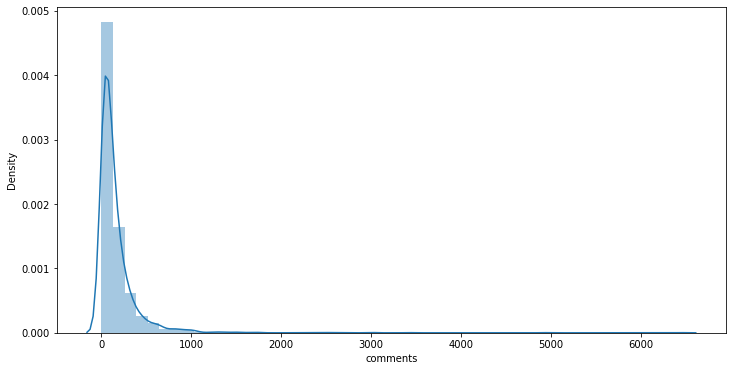

In [ ]:
# distribution of comments feature
plt.figure(figsize=(12,6))
sns.distplot(ted_talk_data.comments)
plt.show()

comments feature are right skewed distribution

* ### **Duration**

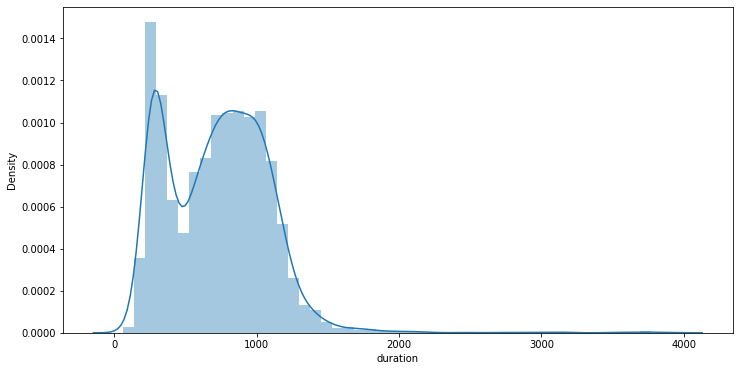

In [ ]:
# distribution of duration feature
plt.figure(figsize=(12,6))
sns.distplot(ted_talk_data.duration)
plt.show()

duration feature are right skewed distribution

* ### **Talk_id**

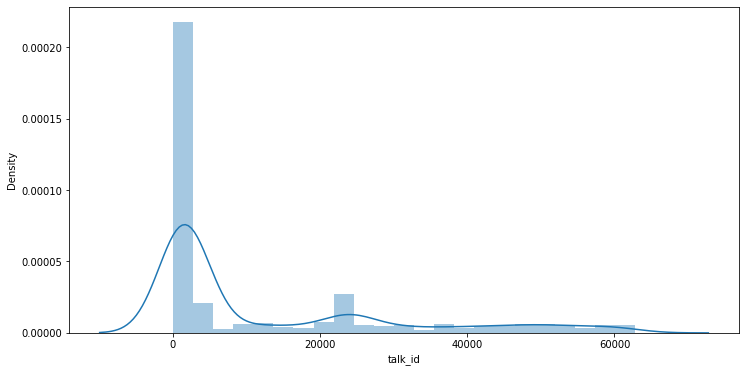

In [ ]:
# distribution of duration feature
plt.figure(figsize=(12,6))
sns.distplot(ted_talk_data.talk_id)
plt.show()

talk_id feature are right skewed distribution

##**Feature Engineering**

* ### **Speaker_1**

In [ ]:
# create new feature speaker_1_avg_views
speaker_avg_views=ted_talk_data.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
speaker_avg_views = speaker_avg_views.to_dict()
speaker_avg_views = speaker_avg_views.values()
speaker_avg_views =  list(speaker_avg_views)[0]
ted_talk_data['speaker_1_avg_views'] = ted_talk_data['speaker_1'].map(speaker_avg_views)

In [ ]:
#now drop speaker_1 feature
ted_talk_data = ted_talk_data.drop('speaker_1', axis=1)

* ### **event**

In [ ]:
# How many unique event name present in dataset
ted_talk_data['event'].nunique()

459

* event feature have lots of similar event name

In [ ]:
print(list(ted_talk_data['event'].unique()))

['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006', 'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001', 'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008', 'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion', 'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008', 'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State', 'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam', 'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED', 'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes', 'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010', 'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC', 'TEDxChange', 'TED Senior Fellows at TEDGlobal 2010', 'TEDxTelAviv 2010', 'TEDxDU 2010', 'TEDxMidwest', 'TEDxHouston', '

In [ ]:
#create new feature event_wise_avg_views
event_wise = ted_talk_data.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
event_wise = event_wise.to_dict()
event_wise = event_wise.values()
event_wise =  list(event_wise)[0]
ted_talk_data['event_wise_avg_views'] = ted_talk_data['event'].map(event_wise)

In [ ]:
#now drop event feature
ted_talk_data = ted_talk_data.drop('event', axis=1)

* ### **available_lang**

In [ ]:
#create new feature num_of_lang
ted_talk_data['available_lang'] = ted_talk_data.apply(lambda x: eval(x['available_lang']), axis=1)
ted_talk_data['num_of_lang'] = ted_talk_data.apply(lambda x: len(x['available_lang']), axis=1)

In [ ]:
#now drop available_lang feature
ted_talk_data = ted_talk_data.drop('available_lang', axis=1)

* ### **topics**

In [ ]:
#create new feature num_of_tag
ted_talk_data['topics'] = ted_talk_data.apply(lambda x: eval(x['topics']), axis=1)
ted_talk_data['num_of_tag'] = ted_talk_data.apply(lambda x: len(x['topics']), axis=1)

In [ ]:
#find unique topics name from topics feature
unique_topics=[]
for i in range(0,len(ted_talk_data)):
  temp = ted_talk_data['topics'][i]
  for words in temp:
    if(words not in unique_topics):
      unique_topics.append(words)

In [ ]:
#storing avg views with respect to each topic in dict unique_topics_avg_views_dict
unique_topics_avg_views_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(ted_talk_data)):
    temp2=ted_talk_data['topics'][i]
    if(topic in temp2):
      temp+=ted_talk_data['views'][i]
      count+=1
  unique_topics_avg_views_dict[topic]=temp//count

#create new feature topics_wise_avg_views

topics_wise_avg_views=[]
for i in range(0,len(ted_talk_data)):
  temp=0
  temp_topic=ted_talk_data['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_views_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

temp_df = pd.Series(topics_wise_avg_views)
ted_talk_data['topics_wise_avg_views'] = temp_df.values

In [ ]:
#now drop topics feature
ted_talk_data = ted_talk_data.drop('topics', axis=1)

* ### **published_date**

In [ ]:
#create new feature video_age
ted_talk_data['video_age'] = 2021 - ted_talk_data['published_year']

In [ ]:
#now drop published_date feature
ted_talk_data = ted_talk_data.drop('published_date', axis=1)

* ### **related_talks**

In [ ]:
# create new feature related_views
ted_talk_data['related_talks'] = ted_talk_data.apply(lambda row: eval(row['related_talks']),axis=1)

ted_talk_data['related_views'] = 0

for index, row in ted_talk_data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(ted_talk_data)):
      if (ted_talk_data.loc[i,'talk_id']) in id_list:
        temp+=ted_talk_data.loc[i,'views']

    ted_talk_data.loc[index,'related_views']=temp//6

In [ ]:
#now drop related_talks feature
ted_talk_data = ted_talk_data.drop('related_talks', axis=1)

## **Data Cleaning**

* ### **Treating NaN values**

In [ ]:
#how many null value present in dataset
ted_talk_data.isna().sum()

talk_id                    0
title                      0
all_speakers               4
occupations              522
about_speakers           503
views                      0
recorded_date              1
native_lang                0
comments                 655
duration                   0
url                        0
description                0
transcript                 0
published_day              0
published_month            0
published_year             0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_lang                0
num_of_tag                 0
topics_wise_avg_views      0
video_age                  0
related_views              0
dtype: int64

In [ ]:
#drop some feature that are not important
ted_talk_data.drop(['talk_id','title','all_speakers', 'occupations','about_speakers','recorded_date','native_lang',
                    'url','description','transcript','published_year'],axis=1, inplace=True)

In [ ]:
#again check how many null value present in dataset after removing some features
ted_talk_data.isna().sum()

views                      0
comments                 655
duration                   0
published_day              0
published_month            0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_lang                0
num_of_tag                 0
topics_wise_avg_views      0
video_age                  0
related_views              0
dtype: int64

* ### **Imputing NaN values**

In [ ]:
#Impute NaN values in comments feature
from sklearn.impute import KNNImputer
imputer = KNNImputer()
ted_talk_data[['comments']] = imputer.fit_transform(ted_talk_data[['comments']])

In [ ]:
#once again check comments feature have any NaN values
ted_talk_data['comments'].isna().sum()

0

* now not any NaN value present in dataset

* ### **Outlier treatment**

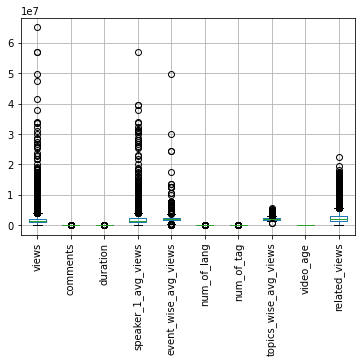

In [ ]:
#visualize box plot to whole dataset
ted_talk_data.boxplot(rot=90)
plt.show()

In [ ]:
#total number of outliers feature-wise in dataset
Q1 = ted_talk_data.quantile(0.25)
Q3 = ted_talk_data.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

((ted_talk_data < (lower_limit)) | (ted_talk_data > (upper_limit))).sum()

comments                 361
duration                  21
event_wise_avg_views     156
num_of_lang              121
num_of_tag               116
published_day              0
published_month            0
related_views            300
speaker_1_avg_views      373
topics_wise_avg_views    242
video_age                  0
views                    393
dtype: int64

In [ ]:
#outliers with extreme values
l = ['views','comments','duration','speaker_1_avg_views','event_wise_avg_views','num_of_lang','num_of_tag',
     'topics_wise_avg_views','related_views']

for i in l:
  Q1 = ted_talk_data[i].quantile(0.25)
  Q3 = ted_talk_data[i].quantile(0.75)
  IQR = Q3 - Q1

  ted_talk_data[i]=np.where(ted_talk_data[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),
                            np.where(ted_talk_data[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),ted_talk_data[i]))

In [ ]:
#again check total number of outliers feature-wise in dataset
Q1 = ted_talk_data.quantile(0.25)
Q3 = ted_talk_data.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

((ted_talk_data < (lower_limit)) | (ted_talk_data > (upper_limit))).sum()

comments                 0
duration                 0
event_wise_avg_views     0
num_of_lang              0
num_of_tag               0
published_day            0
published_month          0
related_views            0
speaker_1_avg_views      0
topics_wise_avg_views    0
video_age                0
views                    0
dtype: int64

* we have treated all outliers, now not any outliers present in dataset

## **Feature Selection**

In [ ]:
#assign X in independent variables and y in dependent variable (views)
X = ted_talk_data.drop('views', axis=1)
y = ted_talk_data['views']

In [ ]:
#one hot encoding on independent features
X = pd.get_dummies(X)
X.shape

(4005, 28)

* now total 28 independent features present in dataset we need to select only important feature that can help to our objective

* ### **Feature selection using f_regression**

In [ ]:
#f scores of all independent features
f_scores = f_regression(X, y)

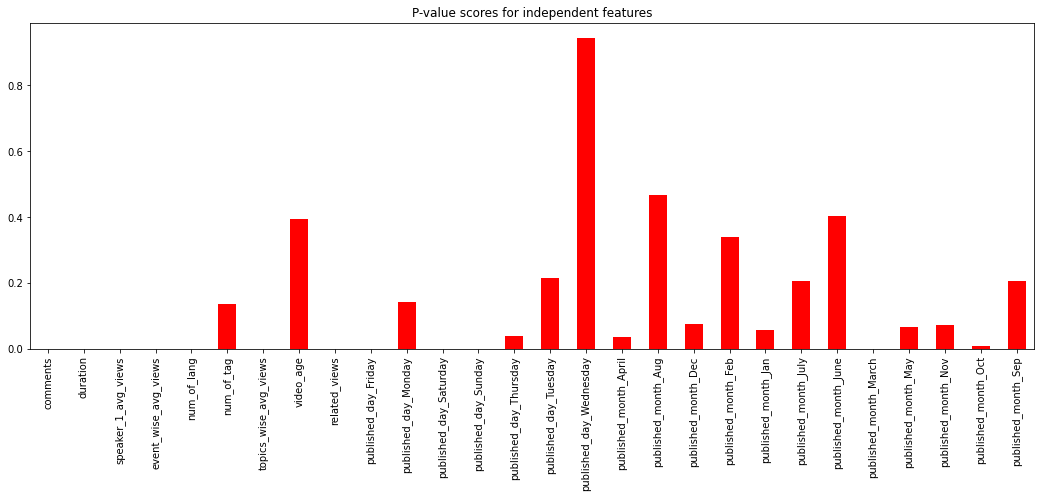

In [ ]:
#visualize P-value scores of all independent features
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='red',figsize=(18,6))
plt.title('P-value scores for independent features')
plt.show()

In [ ]:
#take the important features only that have not high p_value
X = X[['comments','duration','speaker_1_avg_views','event_wise_avg_views','num_of_lang','topics_wise_avg_views','related_views',
       'published_day_Friday','published_day_Saturday','published_day_Sunday','published_month_March']]

In [ ]:
X.shape

(4005, 11)

* we have selected only 11 important independent feature according to the p_value

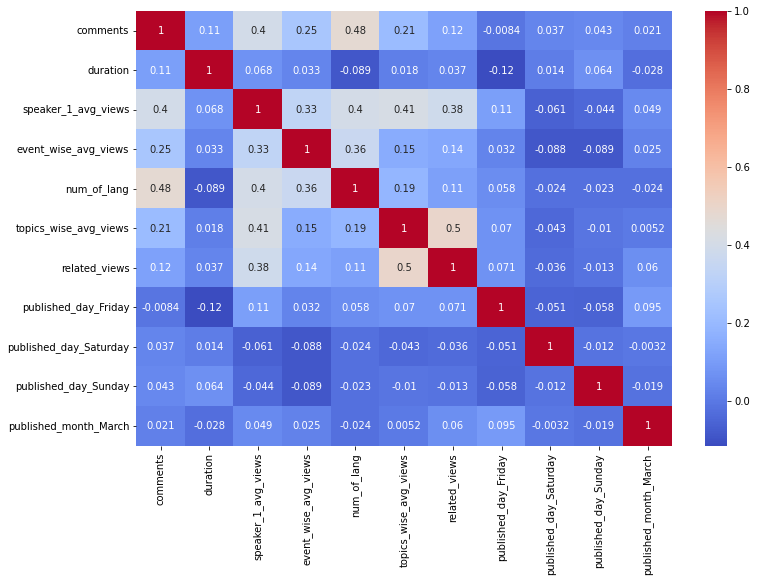

In [ ]:
#correlation matrix of selected features.
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(),annot=True, cmap='coolwarm')
plt.show()

* ### **split data into Training, Testing data and feature scaling**

In [ ]:
#spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
#independent feature scaling in training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## **Regression models and HyperParameter Tuning**


 ### **Random Forest Regressor**

In [ ]:
#Random Forest regressor model with default hyperparameters
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(f'Training data MAE: {metrics.mean_absolute_error(y_train, y_pred)}')
print(f'Testing data MAE: {metrics.mean_absolute_error(y_test, y_test_pred)}')

Training data MAE: 84761.60694600499
Testing data MAE: 220281.74538077405


* #### **Hyperparameter Tuning using Randomized Search CV**

In [ ]:
#Random Forest Regressor hyperparameters.

# Number of trees
n_estimators = [80,100,120,150]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,80,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,30,40,50]

# Hyperparameter Dict
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
#which set of hyperparameters are optimal
rf_optimal_model = rf_random.best_estimator_
rf_optimal_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

*  above are the best hyperparameters for our model

In [ ]:
#Random Forest regressor model with hyperparameters tuning
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print(f'Training data MAE: {metrics.mean_absolute_error(y_train, y_pred)}')
print(f'Testing data MAE: {metrics.mean_absolute_error(y_test, y_test_pred)}')

Training data MAE: 178909.82173259987
Testing data MAE: 193100.53863139823


In [ ]:
# Making predictions for test data and also calculating r2_score
y_hat = rf_optimal_model.predict(X_test)
print(f'R_squared value for training data: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

#Calculating Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For testing dataset the R_Squared for RF is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

R_squared value for training data: 0.8365672753714442
For testing dataset the R_Squared for RF is 0.8269052726211724 and adjusted R_Squared is 0.8264284276421674


In [ ]:
#store all the scores in a dataframe
rf=RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)
rf_optimal_model=rf.fit(X_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'RandomForestRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, rf_optimal_model.predict(X_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, rf_optimal_model.predict(X_test))
model_dict["R2_Score_train"] = r2_score(y_train,rf_optimal_model.predict(X_train))
model_dict["R2_Score_test"] = r2_score(y_test,rf_optimal_model.predict(X_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,rf_optimal_model.predict(X_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,rf_optimal_model.predict(X_test)))
model_data.append(model_dict)

results_df_rf = pd.DataFrame(model_data)

In [ ]:
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,RandomForestRegressor,187180.967821,196193.861386,0.805597,0.810057,487203.715123,475995.998168


* #### **Feature importance score w.r.t. RF model**

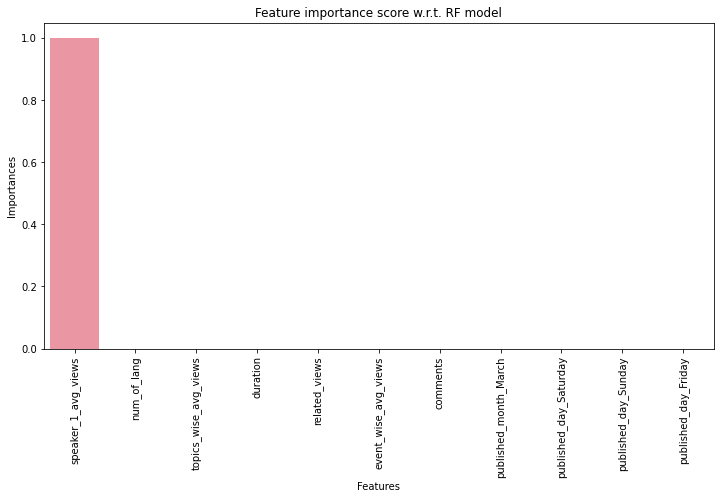

In [ ]:
#visualize important features w.r.t. RF model
importances = pd.DataFrame({'Features': X.columns, 'Importances': rf_optimal_model.feature_importances_})  
importances = importances.sort_values(by=['Importances'], axis='index', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot('Features', 'Importances', data=importances)
plt.xticks(rotation=90)
plt.title('Feature importance score w.r.t. RF model')
plt.show()

* speaker_1_avg_views is the most important feature in Random Forest regressor

### **XGboost Regressor model**

In [ ]:
#XGBoost Regressor hyperparameters

# Number of trees
n_estimators = [30,50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [30,40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=30, max_depth=6 
[15:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=30, max_depth=6, total=   0.4s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=30, max_depth=6 
[15:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=30, max_depth=6, total=   0.3s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=30, max_depth=6 
[15:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=30, max_depth=6, total=   0.3s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=30, max_depth=6 
[15:31:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=30, max_depth=6, total=   0.3s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=30, max_depth=6 
[15:31:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=30, max_depth=6, total=   0.3s
[CV] n

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [ ]:
#which set of hyperparameters are optimal
xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, min_samples_leaf=30,
             min_samples_split=150, missing=None, n_estimators=50, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [ ]:
# Making predictions for test data and also calculating r2_score.

y_hat = xgb_optimal_model.predict(X_test)
print(f'r_squared value for training dataset: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

# Calculating Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For testind  dataset the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_squared value for training dataset: 0.8944986357230307
For testind  dataset the R_Squared for XGBoost is 0.8414065071410005 and adjusted R_Squared is 0.8409696104664578


In [ ]:
# Calculating MAE for training and test set.
y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print(f'Training data MAE: {metrics.mean_absolute_error(y_train, y_pred)}')
print(f'Testing data MAE: {metrics.mean_absolute_error(y_test, y_test_pred)}')

Training data MAE: 179438.54711395912
Testing data MAE: 216041.30115675717


In [ ]:
#store all the scores in a dataframe

xgb=XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=3, min_samples_leaf=40,
             min_samples_split=40, n_estimators=40)
xgb_optimal_model=xgb.fit(X_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'XGBRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, xgb_optimal_model.predict(X_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, xgb_optimal_model.predict(X_test))
model_dict["R2_Score_train"] = r2_score(y_train,xgb_optimal_model.predict(X_train))
model_dict["R2_Score_test"] = r2_score(y_test,xgb_optimal_model.predict(X_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,xgb_optimal_model.predict(X_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,xgb_optimal_model.predict(X_test)))
model_data.append(model_dict)

results_df_xgb = pd.DataFrame(model_data)

[15:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results_df_xgb

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,XGBRegressor,211641.472537,212413.738218,0.862793,0.847065,409305.368846,427115.19598


* #### **Feature importance score w.r.t. XGBRegressor model**

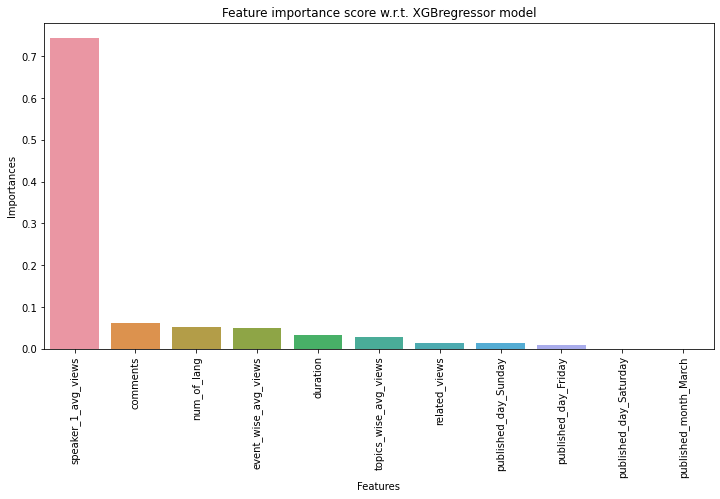

In [ ]:
#visualize important features w.r.t. XGBregressor model
importances = pd.DataFrame({'Features': X.columns, 'Importances': xgb_optimal_model.feature_importances_})  
importances = importances.sort_values(by=['Importances'], axis='index', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot('Features','Importances', data=importances)
plt.xticks(rotation=90)
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

* speaker1_avg_views is the most important feature in XGBregressor model

### **ExtraTrees Regressor**

In [ ]:
#Extra Trees Regressor hyperparameters tuning

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Creating an instance of the Extratrees regressor
et_model = ExtraTreesRegressor(criterion='mae')

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   4.9s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   5.0s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   4.7s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   5.0s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   4.8s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   8.2s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   8.0s
[CV] n_estimators=80, min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mae',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [ ]:
#optimal set of hyperparameters for this model
et_optimal_model = et_random.best_estimator_
et_optimal_model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=8, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=40,
                    min_samples_split=50, min_weight_fraction_leaf=0.0,
                    n_estimators=50, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
# Calculating MAE for training and test set
y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print(f'Training data MAE: {metrics.mean_absolute_error(y_train, y_pred)}')
print(f'Testing data MAE: {metrics.mean_absolute_error(y_test, y_test_pred)}')

Training data MAE: 195872.68271535583
Testing data MAE: 191276.77036828964


In [ ]:
# Making predictions for test data and also calculating r2_score
y_hat = et_optimal_model.predict(X_test)
print(f'r_squared value for training dataset: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

#Calculate Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For testing dataset the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_squared value for training dataset: 0.8055968750615776
For testing dataset the R_Squared for ExtraTreesRegressor is 0.811300635484964 and adjusted R_Squared is 0.8107808025248675


In [ ]:
# store all the scores in a dataframe
et=ExtraTreesRegressor(criterion='mae',max_depth=8, min_samples_leaf=50,min_samples_split=100, n_estimators=50)
et_optimal_model=et.fit(X_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'ExtraTreeRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, et_optimal_model.predict(X_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, et_optimal_model.predict(X_test))
model_dict["R2_Score_train"] = r2_score(y_train,et_optimal_model.predict(X_train))
model_dict["R2_Score_test"] = r2_score(y_test,et_optimal_model.predict(X_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,et_optimal_model.predict(X_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,et_optimal_model.predict(X_test)))
model_data.append(model_dict)

results_df_et = pd.DataFrame(model_data)

In [ ]:
results_df_et

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,ExtraTreeRegressor,196539.136929,191050.530662,0.794492,0.810498,500926.066189,475443.351532


* #### **Feature importance score w.r.t. ExtraTrees Regressor model**

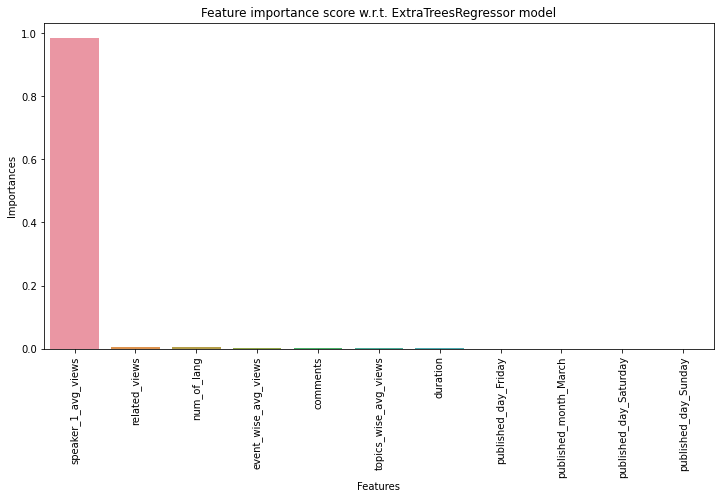

In [ ]:
#visualize important features w.r.t. ExtraTrees Regressor model.
importances = pd.DataFrame({'Features': X.columns, 'Importances': et.feature_importances_})  
importances = importances.sort_values(by=['Importances'], axis='index', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot('Features', 'Importances', data=importances)
plt.xticks(rotation=90)
plt.title('Feature importance score w.r.t. ExtraTreesRegressor model')
plt.show()

* speaker1_avg_views is the most important feature in RandomForestregressor followed by comments

#### **In all the models speaker_1_avg_views is impacting the much**

## **Comparison**

**we have used three model :**

* Random Forest Regressor
* XGB Regressor
* Extra Tree Regressor


In [ ]:
#defining all three models
models = [
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)],
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=8, min_samples_leaf=50,min_samples_split=100, n_estimators=50)],
           ['XGBRegressor: ', XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=3, min_samples_leaf=40,
             min_samples_split=40, n_estimators=40)]        
        ]

In [ ]:
#run all the models and store the scores
model_data = []
for name,curr_model in models :
    model_dict = {}
    curr_model.random_state = 42
    model_dict["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    model_dict["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    model_dict["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    model_dict["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    model_dict["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    model_dict["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    model_dict["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(model_dict)

[15:40:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
comparision_df = pd.DataFrame(model_data)
comparision_df

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,187180.967821,196193.861386,0.805597,0.810057,487203.715123,475995.998168
1,ExtraTreeRegressor :,196643.483961,192259.617865,0.795947,0.811546,499149.127820,474127.227349
2,XGBRegressor:,211641.472537,212413.738218,0.862793,0.847065,409305.368846,427115.195980


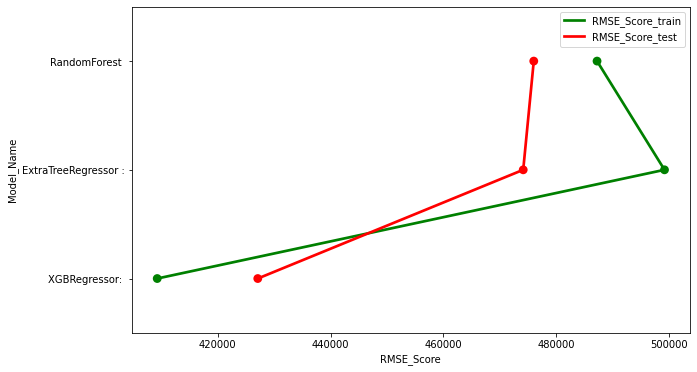

In [ ]:
#visualize RMSE score of training and testing dataset
plt.figure(figsize=(10,6))
ax = plt.subplot()
sns.pointplot(x='RMSE_Score_train',y='Model_Name',color='green',labels=('RMSE_Score_train'),data=comparision_df)
sns.pointplot(x='RMSE_Score_test',y='Model_Name',color='red',labels=('RMSE_Score_test'),data=comparision_df)
plt.xlabel('RMSE_Score')
plt.legend(handles=ax.lines[::len(comparision_df)+1], labels=['RMSE_Score_train','RMSE_Score_test'])
plt.show()

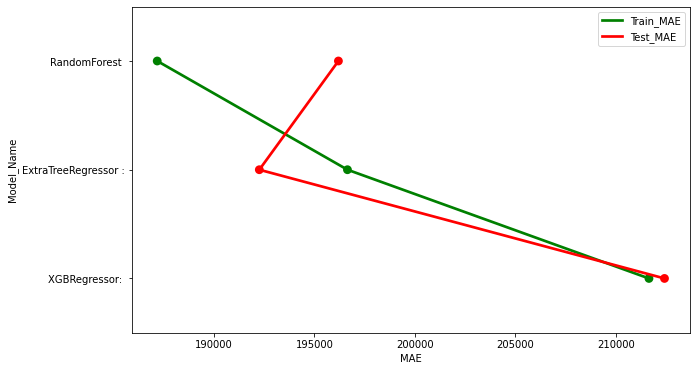

In [ ]:
#visualize MAE score of training and testing dataset
plt.figure(figsize=(10,6))
ax = plt.subplot()
sns.pointplot(x='MAE_train',y='Model_Name',color='green',labels=('MAE_train'),data=comparision_df)
sns.pointplot(x='MAE_test',y='Model_Name',color='red',labels=('MAE_test'),data=comparision_df)
plt.xlabel('MAE')
plt.legend(handles=ax.lines[::len(comparision_df)+1], labels=["Train_MAE","Test_MAE"])
plt.show()

## **Selection of the model**

**We choose MAE and not RMSE as the deciding factor of our model selection  because of the following reasons:**

* RMSE is heavily influenced by outliers as in the higher the values get the more the RMSE increases
* MAE doesn’t increase with outliers, MAE is linear and RMSE is quadratically increasing

* The best performing regressor model for this dataset is Random Forest Regressor on the basis of MAE

In [ ]:
#scores of Random Forest Regressor model 
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,RandomForestRegressor,187180.967821,196193.861386,0.805597,0.810057,487203.715123,475995.998168


In [ ]:
print(f'Mean value of our target variable is {y.mean()}')

Mean value of our target variable is 1661354.1194756555


* For Random Forest Regressor model, MAE is around 10 % of target variable mean

## **Conclusion**

####Out of three models, MAE of Random Forest Regressor is around 10% of average views. So, we have been able to predict views 90% correctly.

####RandomForestRegressor is the best performer in terms of MAE.
####In all the features speaker_wise_avg_views is most important this implies that speakers are directly impacting the views.
#### Duration of talk is not correlated to the number of views however, longest talks belong to the least viewed category.
#### Increasing the number of languages the talk is available in, increases the views of the TED talks.
#### Least viewed TED talks have words like war, politics, world, cultures, government while the most viewed TED talks have words like psychology, work, technology, science, humour.
#### Month of publishing does not affect the popularity of talk.
#### Majority of best TED talks are single speaker talks.